<a href="https://colab.research.google.com/github/kadobkina/ship_detection/blob/master/ship_detection_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init() #check

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AdHtrGL1W1V7nhXNkzlB")
project = rf.workspace("kadobkina").project("ship-detection-ajhw4")
dataset = project.version(6).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=306698be25fa274882af9b4109b506384442088b2c832589c9154608c59b5afc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Ship-Detection-6 in yolov5pytorch:: 100%|██████████| 4178/4178 [00:01<00:00, 2451.52it/s]


In [5]:
!python train.py --img 640 --batch-size 16 --epochs 40 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Ship-Detection-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

In [10]:
!python detect.py --weights /content/yolov5/Ship-Detection-6/best.pt --img 640 --conf 0.25 --source /content/yolov5/Ship-Detection-6/test/images --save-txt

detect: weights=['/content/yolov5/Ship-Detection-6/best.pt'], source=/content/yolov5/Ship-Detection-6/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/200 /content/yolov5/Ship-Detection-6/test/images/test100_jpg.rf.df0772a588b55323cba05e7c3fa08164.jpg: 640x640 1 ship, 478.2ms
image 2/200 /content/yolov5/Ship-Detection-6/test/images/test101_jpg.rf.9dc7adebea8798b37633e41881007ac3.jpg: 640x640 1 ship, 412.8ms
image 3/200 /content/yolov5/Ship-Detection-6/test/images/test102_jpg

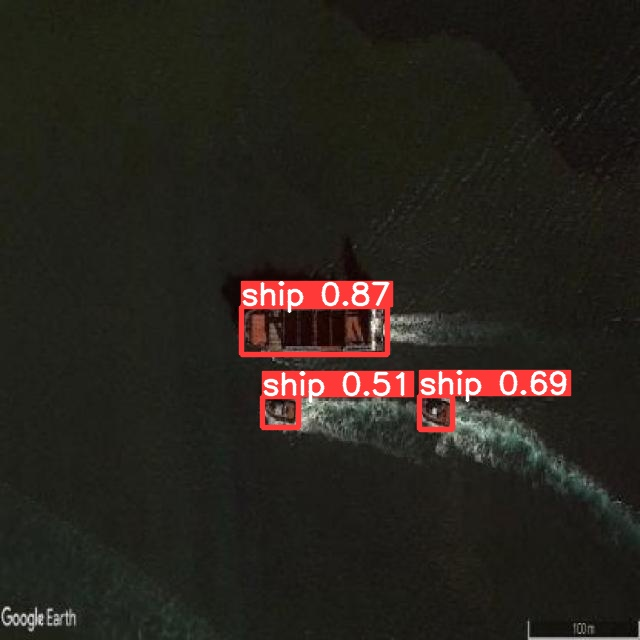

In [35]:
display.Image(filename='runs/detect/exp2/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg', width=600)

In [72]:
imege_label_path = '/content/yolov5/runs/detect/exp2/labels/test106_jpg.rf.93942079b955ab189194cbca0949f797.txt'
imege_path = '/content/yolov5/Ship-Detection-6/test/images/test106_jpg.rf.93942079b955ab189194cbca0949f797.jpg'

f = open(imege_label_path, 'r')

coord_bounding_boxes = [] #x,y,w,h of ships on the image
for line in f:
  coord_bounding_boxes.append(line)
f.close()

ships = []
for index_bounding_boxes in range(len(coord_bounding_boxes)):
  ships.append(coord_bounding_boxes[index_bounding_boxes][1:-2].split())
ships

[['0.4375', '0.642969', '0.05625', '0.048437'],
 ['0.680469', '0.64375', '0.0515625', '0.05312'],
 ['0.490625', '0.515625', '0.228125', '0.07']]

In [67]:
#рамки корабля относительно реального формата изображения
for ship in ships:
  for ind in range(len(ship)):
    ship[ind] = 640*float(ship[ind])

ships

[[280.0, 411.50016, 36.0, 30.99968],
 [435.50016, 412.0, 33.0, 33.9968],
 [314.0, 330.0, 146.0, 44.800000000000004]]

left, upper - верхний левый угол (x,y)
>
right, lower - нижний правый угол (x,y)

In [68]:
new_coord_ships = []
for ship in ships:
  (x,y,w,h) = ship

  left = x-w*0.5
  upper = y-h*0.5

  right = x+w*0.5
  lower = y+h*0.5

  new_coord_ships.append([left,upper,right,lower])


new_coord_ships

[[262.0, 396.00032, 298.0, 427.0],
 [419.00016, 395.0016, 452.00016, 428.9984],
 [241.0, 307.6, 387.0, 352.4]]

Ship № 1


Ship № 2


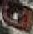

Ship № 3


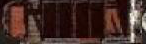

In [116]:
from PIL import Image
import numpy as np

ships_objects_on_image = []
ships_vectors = []

for ship in new_coord_ships:
  ships_objects_on_image.append(im.crop(ship))
  ships_vectors.append(np.asarray(im.crop(ship)))

for ind_ship in range(len(ships_objects_on_image)):
  print('Ship №', ind_ship+1)
  ships_objects_on_image[ind_ship].show()

In [117]:
len(ships_vectors)

3

In [120]:
ships_vectors[0]

array([[[ 17,   7,   5],
        [ 19,   8,   6],
        [ 19,   8,   6],
        ...,
        [ 65,  61,  52],
        [ 72,  68,  59],
        [ 67,  63,  54]],

       [[ 20,  10,   8],
        [ 24,  13,  11],
        [ 30,  19,  17],
        ...,
        [ 78,  71,  63],
        [ 79,  72,  64],
        [ 66,  59,  51]],

       [[ 26,  15,  13],
        [ 31,  20,  18],
        [ 42,  31,  29],
        ...,
        [110, 103,  95],
        [108, 101,  93],
        [ 76,  69,  61]],

       ...,

       [[ 26,  25,  21],
        [ 30,  29,  25],
        [ 34,  33,  29],
        ...,
        [177, 176, 171],
        [202, 201, 196],
        [203, 202, 197]],

       [[ 30,  29,  25],
        [ 34,  33,  29],
        [ 28,  27,  23],
        ...,
        [171, 170, 165],
        [182, 181, 176],
        [212, 211, 206]],

       [[ 32,  31,  27],
        [ 36,  35,  31],
        [ 29,  28,  24],
        ...,
        [142, 141, 136],
        [152, 151, 146],
        [178, 177, 172]]

In [123]:
ships_vectors[0].shape

(31, 36, 3)